# Case Assignment
Scenario: We have the funding to build a new school building in Community School District (CSD) 25 that will house 500 students. The new school can be either a K-5, 6-8, or a K-8 school.

## Assumptions:
- Land acquisition is not an issue, so we have the ability to locate the school wherever we feel is best.
- Instructional models (e.g. school programming) and principal preference are negligible.
- You are planning for the 2021-2022 school year.

## Community Feedback:
- The community has expressed a desire for the new building to be away from a major road.
- The community has expressed interest in opening a middle school in the area.

## The Deliverable: Your final deliverable should include the following components:
- Executive Summary: An executive summary on where broadly you would propose to locate the school, what grades should be served, and an explanation for your rationale.
- Implications: Demonstrate the impact of your decision, including how it will affect enrollment at surrounding schools the following school year? In five years?
- Evaluation: What are the pros of your recommendation? What are some potential concerns or drawbacks?
- Engagement: How would you engage the community regarding this proposal? Who are the appropriate stakeholders to engage?
- Exhibits: Include any tables, graphs, or diagrams that support your analyses. Make sure to cite any assumptions.
- Excel File: Include the CSD 25 Excel spreadsheet with all the formulas and work you’ve done in your analysis.

## Enclosed Attachments:
1) District 25 ES Map – Depicts all of the elementary schools and elementary school zones in CSD 25

2) District 25 MS Map – Depicts all of the middle schools and middle school zones in CSD 25

3) CSD 25 Excel spreadsheet

- School Code. All schools have a 6 digit “DBN” code for identification purposes. The first two digits represent the district number (25); the third character represents the Borough (Q = Queens); the last three digits represent the school number.

- Admissions Policy. This tells you which schools are zoned vs district-wide choice. Zoned schools must accommodate all of the students who live within the school’s geographic zone.

- Most recent ELA and Math Proficiency Rates. Percentage of students who scored proficient (level 3 or 4) on the state exam.

- Zone Data for the Entry Grade. either kindergarten or 6th grade

    - Zone Retention Rate. The percentage of students who attend their zoned school out of the total number of students zoned to the school (in kindergarten or 6th grade).

    - Zone Enrollment Rate. The percentage of students who are zoned to the school out of the total number of students who attend the school (in kindergarten or 6th grade).

- Building Code. This is the 4-digit code that identifies the physical building where the school is located. Some buildings may house multiple schools.
- Org Capacity. This is the official school capacity.

g. Enrollment history. Shows enrollment by grade for the past three years.

## Clarification of Terms:

- Borough: The New York metropolitan area is comprised of five administrative units or boroughs: Brooklyn, Bronx, Queens, Manhattan, and Staten Island. Each borough is divided into districts.
- District: A geographic unit for the local administration of schools. There are 32 geographic districts under the purview of the NYC DOE. Each district is divided into multiple school zones.
- “Zoned to a school” means that a student lives within the zoned boundary lines for a given school. Note that just because a student is zoned to a school does not mean that he or she necessarily attends that school.

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import pandas as pd
#import geopandas as gpd
import seaborn as sns
import requests
import math
import matplotlib.pyplot as plt
from sklearn import neighbors
from scipy import stats

In [2]:
file = "Schools_Enrollment.csv"
schools_enrollment = pd.read_csv(file,  sep=',')

In [3]:
pd.set_option('display.max_rows', None)
schools_enrollment

,Borough,District,DBN,Address,Coordinates,xcoordinate,ycoordinate,Admissions_Policy,ELA_2018_2019,Math_2018_2019,...,First_2020_2021,Second_2020_2021,Third_2020_2021,Fourth_2020_2021,Fifth_2020_2021,Sixth_2020_2021,Seventh_2020_2021,Eighth_2020_2021,Total_2020_2021,Percent_of_Capacity_2020_2021
0,Queens,25,25Q020,"142-30 Barclay Avenue, Queens, NY 11355","40.75841370226242, -73.82317602952483",40.758414,73.823176,Zoned,0.51,0.67,...,163,210,201,169,177,0,0,0,1095,0.96
1,Queens,25,25Q021,"147-36 26 Avenue, Queens, NY 11354","40.774428874902156, -73.81775038534822",40.774429,-73.817750,Zoned,0.63,0.67,...,189,203,215,200,239,0,0,0,1245,1.28
2,Queens,25,25Q022,"153-33 Sanford Avenue, Queens, NY 11355","40.760879082257745, -73.81119827924148",40.760879,-73.811198,Zoned,0.65,0.77,...,139,152,135,144,137,0,0,0,846,1.37
3,Queens,25,25Q024,"45-57 Union Street, Queens, NY 11355","40.75213660256487, -73.81823872341799",40.752137,73.818239,Zoned,0.63,0.83,...,172,165,160,187,193,0,0,0,1031,0.93
4,Queens,25,25Q025,"34-65 192 Street, Queens, NY 11358","40.765246527801665, -73.78915106205352",40.765247,-73.789151,Zoned,0.66,0.64,...,0,0,0,0,0,335,358,373,1066,1.16
5,Queens,25,25Q029,"125-10 23 Avenue, Queens, NY 11356","40.77838843893715, -73.84246176574685",40.778388,73.842462,Zoned,0.54,0.57,...,113,120,104,104,118,0,0,0,680,1.15
6,Queens,25,25Q032,"171-11 35 Avenue, Queens, NY 11358","40.765388049571655, -73.79372838904189",40.765388,-73.793728,Zoned,0.68,0.70,...,170,153,172,153,167,0,0,0,991,1.66
7,Queens,25,25Q079,"147-27 15 Drive, Queens, NY 11357","40.78608875349547, -73.81675901603002",40.786089,73.816759,Zoned,0.74,0.74,...,174,179,178,186,189,0,0,0,1057,1.36
8,Queens,25,25Q107,"167-02 45 Avenue, Queens, NY 11358","40.755712702710426, -73.79885796390053",40.755713,-73.798858,Zoned,0.57,0.61,...,138,153,132,140,133,0,0,0,864,0.87
9,Queens,25,25Q120,"58-01 136 Street, Queens, NY 11355","40.74557607450329, -73.82852761177071",40.745576,73.828528,Zoned,0.53,0.69,...,136,144,138,145,172,0,0,0,859,1.13


In [4]:
schools_enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Borough                         37 non-null     object 
 1   District                        37 non-null     int64  
 2   DBN                             37 non-null     object 
 3   Address                         37 non-null     object 
 4   Coordinates                     37 non-null     object 
 5   xcoordinate                     37 non-null     float64
 6   ycoordinate                     37 non-null     float64
 7   Admissions_Policy               37 non-null     object 
 8   ELA_2018_2019                   37 non-null     float64
 9   Math_2018_2019                  37 non-null     float64
 10  Zone_Retention_Rate_2020_2021   28 non-null     float64
 11  Zone_Enrollment_Rate_2020_2021  28 non-null     float64
 12  Building_Code                   37 non

In [5]:
mask = schools_enrollment['Admissions_Policy'] == 'Zoned'
scores_rates = schools_enrollment[['ELA_2018_2019', 'Math_2018_2019', 'Zone_Retention_Rate_2020_2021', 'Zone_Enrollment_Rate_2020_2021']][mask]

### Relationships

Zone Retention Rate
- Math Scores: 0.55 moderate positive correlation
- ELA Scores: 0.49 moderate positive correlation

Zone Enrollment Rate 
- Math Scores: 0.40 weak positive correlation
- ELA Scores: 0.19 weak positive correlation

In [6]:
scores_rates.corr()

,ELA_2018_2019,Math_2018_2019,Zone_Retention_Rate_2020_2021,Zone_Enrollment_Rate_2020_2021
ELA_2018_2019,1.000000,0.687294,0.486765,0.185381
Math_2018_2019,0.687294,1.000000,0.554389,0.399707
Zone_Retention_Rate_2020_2021,0.486765,0.554389,1.000000,0.237077
Zone_Enrollment_Rate_2020_2021,0.185381,0.399707,0.237077,1.000000


In [7]:
ax = plt.axes()
sns.heatmap(scores_rates.corr(), ax=ax)
ax.set_title('Correlation Between Test Scores and Retention Rate and Enrollment Rate', fontsize=12)

Text(0.5, 1.0, 'Correlation Between Test Scores and Retention Rate and Enrollment Rate')

In [8]:
sns.pairplot(scores_rates, x_vars='Math_2018_2019', y_vars='Zone_Retention_Rate_2020_2021', height=7)
plt.title('Relationship between 2018-2019 Math Scores and 2020-2021 Zone Retention Rate at Zoned Schools', fontsize=12)

Text(0.5, 1.0, 'Relationship between 2018-2019 Math Scores and 2020-2021 Zone Retention Rate at Zoned Schools')

Text(0.5, 1.0, 'Relationship between 2018-2019 ELA Scores and 2020-2021 Zone Retention Rate at Zoned Schools')

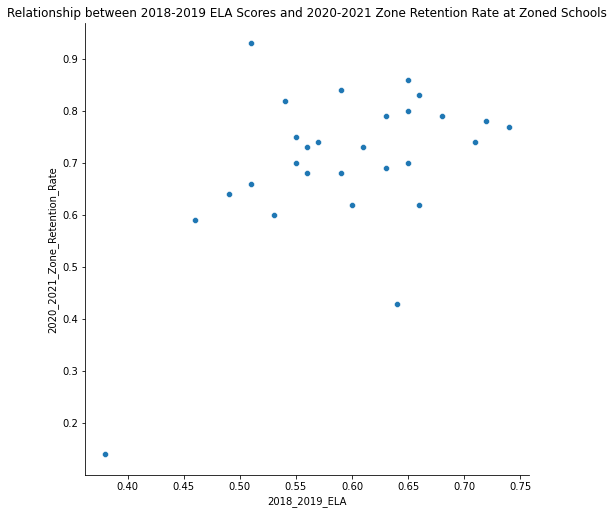

In [53]:
sns.pairplot(scores_rates, x_vars='2018_2019_ELA', y_vars='2020_2021_Zone_Retention_Rate', height=7)
plt.title('Relationship between 2018-2019 ELA Scores and 2020-2021 Zone Retention Rate at Zoned Schools', fontsize=12)

In [8]:
schools_enrollment.groupby('School_Type').mean()

,District,xcoordinate,ycoordinate,ELA_2018_2019,Math_2018_2019,Zone_Retention_Rate_2020_2021,Zone_Enrollment_Rate_2020_2021,Org_Capacity_2018_2019,K_2017_2018,First_2017_2018,...,First_2020_2021,Second_2020_2021,Third_2020_2021,Fourth_2020_2021,Fifth_2020_2021,Sixth_2020_2021,Seventh_2020_2021,Eighth_2020_2021,Total_2020_2021,Percent_of_Capacity_2020_2021
School_Type,,,,,,,,,,,,,,,,,,,,,
6-8,25.0,40.760511,33.555165,0.583636,0.591818,0.566667,0.806667,751.818182,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,234.909091,243.636364,229.727273,708.272727,0.897273
K-5,25.0,40.763382,20.130281,0.637727,0.723636,0.741579,0.847895,698.045455,127.227273,119.727273,...,119.409091,125.636364,119.818182,112.318182,116.136364,0.000000,0.000000,0.000000,713.272727,1.082727
K-8,25.0,40.731803,-0.003890,0.605000,0.610000,0.720000,0.770000,617.750000,55.500000,54.250000,...,55.000000,53.500000,59.250000,60.500000,62.000000,72.000000,68.500000,75.250000,561.500000,0.910000


In [9]:
#create percent change columns
schools_enrollment['percent_change_2018_2019'] = (schools_enrollment.iloc[:, 36] - schools_enrollment.iloc[:, 25]) / schools_enrollment.iloc[:, 25]
schools_enrollment['percent_change_2019_2020'] = (schools_enrollment.iloc[:, 47] - schools_enrollment.iloc[:, 36]) / schools_enrollment.iloc[:, 36]
schools_enrollment['percent_change_2020_2021'] = (schools_enrollment.iloc[:, 58] - schools_enrollment.iloc[:, 47]) / schools_enrollment.iloc[:, 47]


In [10]:
schools_enrollment

,Borough,District,DBN,Address,Coordinates,xcoordinate,ycoordinate,Admissions_Policy,ELA_2018_2019,Math_2018_2019,...,Fourth_2020_2021,Fifth_2020_2021,Sixth_2020_2021,Seventh_2020_2021,Eighth_2020_2021,Total_2020_2021,Percent_of_Capacity_2020_2021,percent_change_2018_2019,percent_change_2019_2020,percent_change_2020_2021
0,Queens,25,25Q020,"142-30 Barclay Avenue, Queens, NY 11355","40.75841370226242, -73.82317602952483",40.758414,73.823176,Zoned,0.51,0.67,...,169,177,0,0,0,1095,0.96,-0.036566,-0.074257,-0.024064
1,Queens,25,25Q021,"147-36 26 Avenue, Queens, NY 11354","40.774428874902156, -73.81775038534822",40.774429,-73.817750,Zoned,0.63,0.67,...,200,239,0,0,0,1245,1.28,0.016717,-0.059791,-0.010334
2,Queens,25,25Q022,"153-33 Sanford Avenue, Queens, NY 11355","40.760879082257745, -73.81119827924148",40.760879,-73.811198,Zoned,0.65,0.77,...,144,137,0,0,0,846,1.37,0.033879,-0.006780,-0.037543
3,Queens,25,25Q024,"45-57 Union Street, Queens, NY 11355","40.75213660256487, -73.81823872341799",40.752137,73.818239,Zoned,0.63,0.83,...,187,193,0,0,0,1031,0.93,0.002020,0.018145,0.020792
4,Queens,25,25Q025,"34-65 192 Street, Queens, NY 11358","40.765246527801665, -73.78915106205352",40.765247,-73.789151,Zoned,0.66,0.64,...,0,0,335,358,373,1066,1.16,0.074190,0.024319,0.012346
5,Queens,25,25Q029,"125-10 23 Avenue, Queens, NY 11356","40.77838843893715, -73.84246176574685",40.778388,73.842462,Zoned,0.54,0.57,...,104,118,0,0,0,680,1.15,0.016153,-0.036127,0.019490
6,Queens,25,25Q032,"171-11 35 Avenue, Queens, NY 11358","40.765388049571655, -73.79372838904189",40.765388,-73.793728,Zoned,0.68,0.70,...,153,167,0,0,0,991,1.66,0.008520,0.012672,0.033368
7,Queens,25,25Q079,"147-27 15 Drive, Queens, NY 11357","40.78608875349547, -73.81675901603002",40.786089,73.816759,Zoned,0.74,0.74,...,186,189,0,0,0,1057,1.36,0.038716,-0.043636,0.004753
8,Queens,25,25Q107,"167-02 45 Avenue, Queens, NY 11358","40.755712702710426, -73.79885796390053",40.755713,-73.798858,Zoned,0.57,0.61,...,140,133,0,0,0,864,0.87,0.007856,-0.031180,-0.006897
9,Queens,25,25Q120,"58-01 136 Street, Queens, NY 11355","40.74557607450329, -73.82852761177071",40.745576,73.828528,Zoned,0.53,0.69,...,145,172,0,0,0,859,1.13,-0.042033,-0.059184,-0.068330


In [11]:
schools_enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Borough                         37 non-null     object 
 1   District                        37 non-null     int64  
 2   DBN                             37 non-null     object 
 3   Address                         37 non-null     object 
 4   Coordinates                     37 non-null     object 
 5   xcoordinate                     37 non-null     float64
 6   ycoordinate                     37 non-null     float64
 7   Admissions_Policy               37 non-null     object 
 8   ELA_2018_2019                   37 non-null     float64
 9   Math_2018_2019                  37 non-null     float64
 10  Zone_Retention_Rate_2020_2021   28 non-null     float64
 11  Zone_Enrollment_Rate_2020_2021  28 non-null     float64
 12  Building_Code                   37 non

In [12]:
#average percent change in enrollment from the 2018-19 school year to the 2019-20 school year
percent_change_2019_2020_df = schools_enrollment['percent_change_2019_2020'].drop([schools_enrollment['percent_change_2019_2020'].index[35]])
percent_change_2019_2020 = percent_change_2019_2020_df.mean()
percent_change_2019_2020

-0.014377980278760034

In [13]:
#Replace null values and infinity values with mean 
#schools_enrollment['percent_change_2019_2020'] = schools_enrollment['percent_change_2019_2020'].replace([np.inf, -np.inf], np.NaN)
schools_enrollment['percent_change_2018_2019'].fillna(value=schools_enrollment['percent_change_2018_2019'].mean(), inplace=True)
schools_enrollment.at[35, 'percent_change_2019_2020'] = percent_change_2019_2020

In [14]:
schools_enrollment['average_percent_change'] = schools_enrollment[['percent_change_2018_2019', 'percent_change_2019_2020', 'percent_change_2020_2021']].mean(axis=1)

In [15]:
schools_enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Borough                         37 non-null     object 
 1   District                        37 non-null     int64  
 2   DBN                             37 non-null     object 
 3   Address                         37 non-null     object 
 4   Coordinates                     37 non-null     object 
 5   xcoordinate                     37 non-null     float64
 6   ycoordinate                     37 non-null     float64
 7   Admissions_Policy               37 non-null     object 
 8   ELA_2018_2019                   37 non-null     float64
 9   Math_2018_2019                  37 non-null     float64
 10  Zone_Retention_Rate_2020_2021   28 non-null     float64
 11  Zone_Enrollment_Rate_2020_2021  28 non-null     float64
 12  Building_Code                   37 non

In [16]:
#create a new dataframe to hold only enrollment data
total_enrollment = schools_enrollment[['Total_2017_2018', 'Total_2018_2019', 'Total_2019_2020', 'Total_2020_2021']]

In [17]:
#rename columns in the total_enrollment table to the fiscal year
cols = ['2018', '2019', '2020', '2021']
total_enrollment.columns = cols

In [18]:
#create a new dataframe to hold only percent change in enrollment data and rename columns
percent_change = schools_enrollment[['percent_change_2018_2019', 'percent_change_2019_2020', 'percent_change_2020_2021']]
cols = ['2019', '2020', '2021']
percent_change.columns = cols
percent_change

,2019,2020,2021
0,-0.036566,-0.074257,-0.024064
1,0.016717,-0.059791,-0.010334
2,0.033879,-0.006780,-0.037543
3,0.002020,0.018145,0.020792
4,0.074190,0.024319,0.012346
5,0.016153,-0.036127,0.019490
6,0.008520,0.012672,0.033368
7,0.038716,-0.043636,0.004753
8,0.007856,-0.031180,-0.006897
9,-0.042033,-0.059184,-0.068330


In [19]:
total_enrollment

,2018,2019,2020,2021
0,1258,1212,1122,1095
1,1316,1338,1258,1245
2,856,885,879,846
3,990,992,1010,1031
4,957,1028,1053,1066
5,681,692,667,680
6,939,947,959,991
7,1059,1100,1052,1057
8,891,898,870,864
9,1023,980,922,859


In [20]:
for i in range(0,5): 
    #append new school year's enrollment numbers to the total_enrollment table 
    enrollment_new_col_name = int(total_enrollment.columns[-1]) + 1
    
    new_school_year_enrollment = total_enrollment.iloc[:,-1] * (1 + percent_change.iloc[:, -3:].mean(axis=1))
    total_enrollment[enrollment_new_col_name] = new_school_year_enrollment
    
    #append to percent changes to percent_change table
    percent_change_new_col_name = int(percent_change.columns[-1]) + 1

    new_percent_change = (total_enrollment.iloc[:,-1] - total_enrollment.iloc[:,-2]) / total_enrollment.iloc[:,-2] 
    percent_change[percent_change_new_col_name] = new_percent_change 
    
    

<ipython-input-20-ae9c3ef116a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_enrollment[enrollment_new_col_name] = new_school_year_enrollment
<ipython-input-20-ae9c3ef116a6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent_change[percent_change_new_col_name] = new_percent_change


In [21]:
total_enrollment

,2018,2019,2020,2021,2022,2023,2024,2025,2026
0,1258,1212,1122,1095,1045.766035,995.818813,957.052227,915.052547,875.224839
1,1316,1338,1258,1245,1222.835983,1186.995875,1164.266766,1138.552048,1111.779355
2,856,885,879,846,843.054843,829.621159,813.869842,803.451777,790.671178
3,990,992,1010,1031,1045.075708,1063.395788,1081.818931,1099.310937,1118.007944
4,957,1028,1053,1066,1105.390449,1132.515399,1160.388912,1193.693031,1224.670025
5,681,692,667,680,679.890249,676.083246,679.177323,678.909192,678.588350
6,939,947,959,991,1009.022785,1030.624667,1055.690583,1078.182517,1102.274588
7,1059,1100,1052,1057,1056.940899,1043.222008,1040.341717,1034.863735,1027.617507
8,891,898,870,864,855.296464,841.568816,832.305878,822.004580,811.199678
9,1023,980,922,859,810.453149,760.737539,713.524079,670.731360,629.731904


In [23]:
#adjist total_enrollment table so that projections for 25Q379 (row 35) are based on values in percent_change table
#replace value in this cell, 4 is 2022, but don't use percent change, use average where mask is 6-8 and district-wide: total_enrollment.iloc[35, 4] 
percent_change


,2019,2020,2021,2022,2023,2024,2025,2026
0,-0.036566,-0.074257,-0.024064,-0.044963,-0.047761,-0.038929,-0.043884,-0.043525
1,0.016717,-0.059791,-0.010334,-0.017802,-0.029309,-0.019148,-0.022087,-0.023515
2,0.033879,-0.006780,-0.037543,-0.003481,-0.015935,-0.018986,-0.012801,-0.015907
3,0.002020,0.018145,0.020792,0.013652,0.017530,0.017325,0.016169,0.017008
4,0.074190,0.024319,0.012346,0.036952,0.024539,0.024612,0.028701,0.025951
5,0.016153,-0.036127,0.019490,-0.000161,-0.005599,0.004576,-0.000395,-0.000473
6,0.008520,0.012672,0.033368,0.018186,0.021409,0.024321,0.021305,0.022345
7,0.038716,-0.043636,0.004753,-0.000056,-0.012980,-0.002761,-0.005266,-0.007002
8,0.007856,-0.031180,-0.006897,-0.010074,-0.016050,-0.011007,-0.012377,-0.013145
9,-0.042033,-0.059184,-0.068330,-0.056516,-0.061343,-0.062063,-0.059974,-0.061126


In [21]:
total_enrollment = pd.concat([schools_enrollment.iloc[:, 7], schools_enrollment.iloc[:,13:16], total_enrollment], axis=1)

In [22]:
total_enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Admissions_Policy       37 non-null     object 
 1   School_Type             37 non-null     object 
 2   Grades_from_LCGMS       37 non-null     object 
 3   Org_Capacity_2018_2019  37 non-null     int64  
 4   2018                    37 non-null     int64  
 5   2019                    37 non-null     int64  
 6   2020                    37 non-null     int64  
 7   2021                    37 non-null     int64  
 8   2022                    37 non-null     float64
 9   2023                    37 non-null     float64
 10  2024                    37 non-null     float64
 11  2025                    37 non-null     float64
 12  2026                    37 non-null     float64
dtypes: float64(5), int64(5), object(3)
memory usage: 3.9+ KB


In [23]:
percent_change

,2019,2020,2021,2022,2023,2024,2025,2026
0,-0.036566,-0.074257,-0.024064,-0.044963,-0.047761,-0.038929,-0.043884,-0.043525
1,0.016717,-0.059791,-0.010334,-0.017802,-0.029309,-0.019148,-0.022087,-0.023515
2,0.033879,-0.006780,-0.037543,-0.003481,-0.015935,-0.018986,-0.012801,-0.015907
3,0.002020,0.018145,0.020792,0.013652,0.017530,0.017325,0.016169,0.017008
4,0.074190,0.024319,0.012346,0.036952,0.024539,0.024612,0.028701,0.025951
5,0.016153,-0.036127,0.019490,-0.000161,-0.005599,0.004576,-0.000395,-0.000473
6,0.008520,0.012672,0.033368,0.018186,0.021409,0.024321,0.021305,0.022345
7,0.038716,-0.043636,0.004753,-0.000056,-0.012980,-0.002761,-0.005266,-0.007002
8,0.007856,-0.031180,-0.006897,-0.010074,-0.016050,-0.011007,-0.012377,-0.013145
9,-0.042033,-0.059184,-0.068330,-0.056516,-0.061343,-0.062063,-0.059974,-0.061126


In [54]:
mask = (schools_enrollment['School_Type'] == '6-8') & (schools_enrollment['Admissions_Policy'] == 'District-Wide Choice')
pd.set_option('display.max_columns', None)
total_enrollment.iloc[:,:][mask].head(4)

,Admissions_Policy,School_Type,Grades_from_LCGMS,Org_Capacity_2018_2019,2018,2019,2020,2021,2022,2023,2024,2025,2026,capacity_2018,capacity_2019,capacity_2020,capacity_2021,capacity_2022,capacity_2023,capacity_2024,capacity_2025,capacity_2026
31,District-Wide Choice,6-8,"06,07,08,09,10,11,12,SE",509,250,247,253,250,250.036149,251.084500,250.455088,250.607918,250.799736,1.0,0.988000,1.012000,1.000000,1.000145,1.004338,1.001820,1.002432,1.003199
32,District-Wide Choice,6-8,"06,07,08,09,10,11,12,SE",593,336,300,297,301,290.597957,287.586368,284.571150,279.315475,275.654884,1.0,0.892857,0.883929,0.895833,0.864875,0.855912,0.846938,0.831296,0.820401
33,District-Wide Choice,6-8,"06,07,08,09,10,11,12,SE",672,235,247,257,267,278.610955,290.023143,301.948726,314.587007,327.583241,1.0,1.051064,1.093617,1.136170,1.185579,1.234141,1.284888,1.338668,1.393971
34,District-Wide Choice,6-8,"06,07,08,SE",277,369,375,363,361,358.442979,353.114987,349.883153,346.256056,342.287590,1.0,1.016260,0.983740,0.978320,0.971390,0.956951,0.948193,0.938363,0.927609


In [55]:
mask = (schools_enrollment['School_Type'] == '6-8') & (schools_enrollment['Admissions_Policy'] == 'District-Wide Choice')
total_enrollment.iloc[:,i][mask].head(4)

31    250.799736
32    275.654884
33    327.583241
34    342.287590
Name: 2026, dtype: float64

In [51]:
mask = (schools_enrollment['School_Type'] == '6-8') & (schools_enrollment['Admissions_Policy'] == 'District-Wide Choice')
for i in range(8, 13): 
    average_projected_enrollment = total_enrollment.iloc[:,i][mask].head(4).mean()
    total_enrollment.at[35, total_enrollment.columns[i]] = average_projected_enrollment

In [53]:
pd.set_option('display.max_columns', None)
total_enrollment

,Admissions_Policy,School_Type,Grades_from_LCGMS,Org_Capacity_2018_2019,2018,2019,2020,2021,2022,2023,2024,2025,2026,capacity_2018,capacity_2019,capacity_2020,capacity_2021,capacity_2022,capacity_2023,capacity_2024,capacity_2025,capacity_2026
0,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",1146,1258,1212,1122,1095,1045.766035,995.818813,957.052227,915.052547,875.224839,1.0,0.963434,0.891892,0.870429,0.831293,0.791589,0.760773,0.727387,0.695727
1,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",976,1316,1338,1258,1245,1222.835983,1186.995875,1164.266766,1138.552048,1111.779355,1.0,1.016717,0.955927,0.946049,0.929207,0.901973,0.884701,0.865161,0.844817
2,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",616,856,885,879,846,843.054843,829.621159,813.869842,803.451777,790.671178,1.0,1.033879,1.026869,0.988318,0.984877,0.969184,0.950783,0.938612,0.923681
3,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",1111,990,992,1010,1031,1045.075708,1063.395788,1081.818931,1099.310937,1118.007944,1.0,1.002020,1.020202,1.041414,1.055632,1.074137,1.092746,1.110415,1.129301
4,Zoned,6-8,"06,07,08,SE",922,957,1028,1053,1066,1105.390449,1132.515399,1160.388912,1193.693031,1224.670025,1.0,1.074190,1.100313,1.113898,1.155058,1.183402,1.212528,1.247328,1.279697
5,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",592,681,692,667,680,679.890249,676.083246,679.177323,678.909192,678.588350,1.0,1.016153,0.979442,0.998532,0.998370,0.992780,0.997324,0.996930,0.996459
6,Zoned,K-5,"0K,01,02,03,04,05,SE",598,939,947,959,991,1009.022785,1030.624667,1055.690583,1078.182517,1102.274588,1.0,1.008520,1.021299,1.055378,1.074572,1.097577,1.124271,1.148224,1.173881
7,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",775,1059,1100,1052,1057,1056.940899,1043.222008,1040.341717,1034.863735,1027.617507,1.0,1.038716,0.993390,0.998111,0.998056,0.985101,0.982381,0.977208,0.970366
8,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",989,891,898,870,864,855.296464,841.568816,832.305878,822.004580,811.199678,1.0,1.007856,0.976431,0.969697,0.959929,0.944522,0.934126,0.922564,0.910437
9,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",761,1023,980,922,859,810.453149,760.737539,713.524079,670.731360,629.731904,1.0,0.957967,0.901271,0.839687,0.792232,0.743634,0.697482,0.655651,0.615574


In [23]:
schools_enrollment.at[35, 'Total_2017_2018'] = avg_enrollment_2018
schools_enrollment.at[35, 'Total_2018_2019'] = avg_enrollment_2019

total_enrollment.at[35, '2022'] = avg_enrollment_2018

,Admissions_Policy,School_Type,Grades_from_LCGMS,Org_Capacity_2018_2019,2018,2019,2020,2021,2022,2023,...,2026,capacity_2018,capacity_2019,capacity_2020,capacity_2021,capacity_2022,capacity_2023,capacity_2024,capacity_2025,capacity_2026
0,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",1146,1258,1212,1122,1095,1045.766035,995.818813,...,875.224839,1.0,0.963434,0.891892,0.870429,0.831293,0.791589,0.760773,0.727387,0.695727
1,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",976,1316,1338,1258,1245,1222.835983,1186.995875,...,1111.779355,1.0,1.016717,0.955927,0.946049,0.929207,0.901973,0.884701,0.865161,0.844817
2,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",616,856,885,879,846,843.054843,829.621159,...,790.671178,1.0,1.033879,1.026869,0.988318,0.984877,0.969184,0.950783,0.938612,0.923681
3,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",1111,990,992,1010,1031,1045.075708,1063.395788,...,1118.007944,1.0,1.002020,1.020202,1.041414,1.055632,1.074137,1.092746,1.110415,1.129301
4,Zoned,6-8,"06,07,08,SE",922,957,1028,1053,1066,1105.390449,1132.515399,...,1224.670025,1.0,1.074190,1.100313,1.113898,1.155058,1.183402,1.212528,1.247328,1.279697
5,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",592,681,692,667,680,679.890249,676.083246,...,678.588350,1.0,1.016153,0.979442,0.998532,0.998370,0.992780,0.997324,0.996930,0.996459
6,Zoned,K-5,"0K,01,02,03,04,05,SE",598,939,947,959,991,1009.022785,1030.624667,...,1102.274588,1.0,1.008520,1.021299,1.055378,1.074572,1.097577,1.124271,1.148224,1.173881
7,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",775,1059,1100,1052,1057,1056.940899,1043.222008,...,1027.617507,1.0,1.038716,0.993390,0.998111,0.998056,0.985101,0.982381,0.977208,0.970366
8,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",989,891,898,870,864,855.296464,841.568816,...,811.199678,1.0,1.007856,0.976431,0.969697,0.959929,0.944522,0.934126,0.922564,0.910437
9,Zoned,K-5,"PK,0K,01,02,03,04,05,SE",761,1023,980,922,859,810.453149,760.737539,...,629.731904,1.0,0.957967,0.901271,0.839687,0.792232,0.743634,0.697482,0.655651,0.615574


In [ ]:
total_enrollment

In [22]:
for i in range(4,13):
    enrollment_new_col_name = 'capacity_' + str(int(total_enrollment.columns[i]))
    total_enrollment[enrollment_new_col_name] = total_enrollment.iloc[:,i] / total_enrollment.iloc[:,4]

In [26]:
total_enrollment.sort_values('capacity_2026', ascending=False)

KeyError: 'capacity_2026'

In [39]:
total_enrollment_by_school_type = total_enrollment.iloc[:,0:12].groupby('School_Type').sum()
total_enrollment_by_school_type

,Org_Capacity_2018_2019,2018,2019,2020,2021,2022,2023,2024,2025,2026
School_Type,,,,,,,,,,
6-8,8270,7299,7497,7682,7791,7987.888330,8251.425621,8772.151493,9482.969666,10648.081861
K-5,15357,16202,16287,15808,15692,15559.410028,15353.892601,15228.039259,15099.003982,14970.039753
K-8,2471,2187,2230,2238,2246,2269.430292,2284.762984,2301.660481,2322.129469,2341.262810


In [ ]:

new_col_name = int(total_enrollment.columns[-1]) + 1
new_col_name

In [ ]:
#2018 and 2019 average enrollment
mask = (schools_enrollment['School_Type'] == '6-8') & (schools_enrollment['Admissions_Policy'] == 'District-Wide Choice')
avg_enrollment_2018 = schools_enrollment['Total_2017_2018'][mask].head(10).mean()
avg_enrollment_2019 = schools_enrollment['Total_2018_2019'][mask].head(10).mean()
schools_enrollment.at[35, 'Total_2017_2018'] = avg_enrollment_2018
schools_enrollment.at[35, 'Total_2018_2019'] = avg_enrollment_2019

In [ ]:
mask = (schools_enrollment['School_Type'] == '6-8') & (schools_enrollment['Admissions_Policy'] == 'District-Wide Choice')
schools_enrollment[mask]
pd.set_option('display.max_columns', None)

schools_enrollment